In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile,QuantumRegister,ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum-computing.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

**Copenhagen Vs Many-World Interpretation**

Copenhagen states that in the case of Schrodinger's Cat observation led to collapse, while Many-World states that observation leads us to become entangled with the cat, and we eneter a joint superposition of cat being dead and alive.
Many World Interpretation was an attempt to use Quantum Mechanics at all scales.

This is based on a thought experiment by David Deutsch(https://boulderschool.yale.edu/sites/default/files/files/Deutsch.pdf)

*No-Collapse Case*

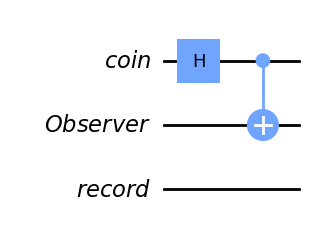

In [2]:
#We can think of qubit as coin spinning on its axis, and collapse as pushing the coin so as to get it in either heads or tails. So initially the coin is superposition of both heads and tails
#This is NO-collapse case(Many World Interpretation)(Reversible Quantum Measurement)
qr1=QuantumRegister(1,name="coin")
qr2=QuantumRegister(1,name="Observer")
qr3=QuantumRegister(1,name="record")
qc=QuantumCircuit(qr1,qr2,qr3)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

Now we perform a prity check on coin and Observer qubit. this is to make sure the observer's memory fipped in right direction and this we write in record

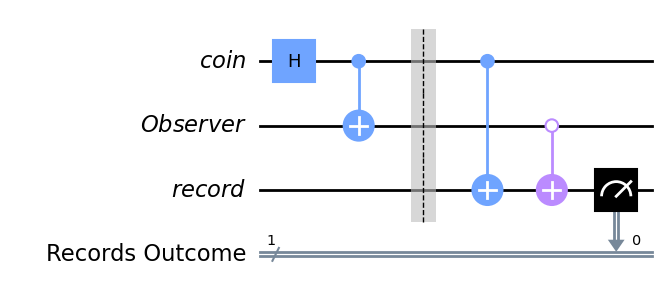

In [3]:
qc.barrier()
qc.cx(0,2)
from qiskit.circuit.library.standard_gates import XGate
acx=XGate().control(1,ctrl_state='0')
qc.append(acx,[1,2])
cr1=ClassicalRegister(1,name='Records Outcome')
qc.add_register(cr1)
qc.measure(2,0)
qc.draw('mpl')
# This ensures that if both coin an dobserver are 0 or both 1, then it would indicate correct and record will flip to 1, otherwise either none or both Xgate will be applied and record will not flip                   

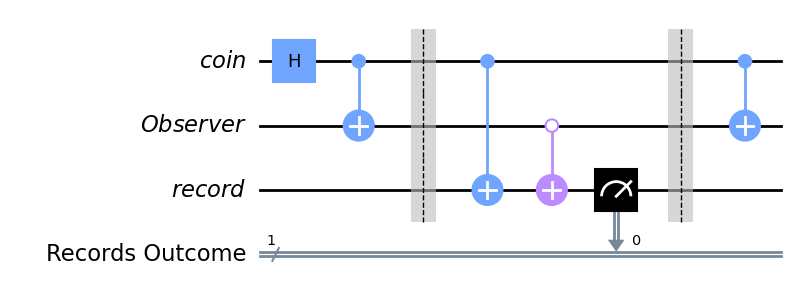

In [4]:
qc.barrier()
qc.cx(0,1)#undoes the  observer's measurement, therefore unentangling it and returning it to to the original state
qc.draw('mpl')

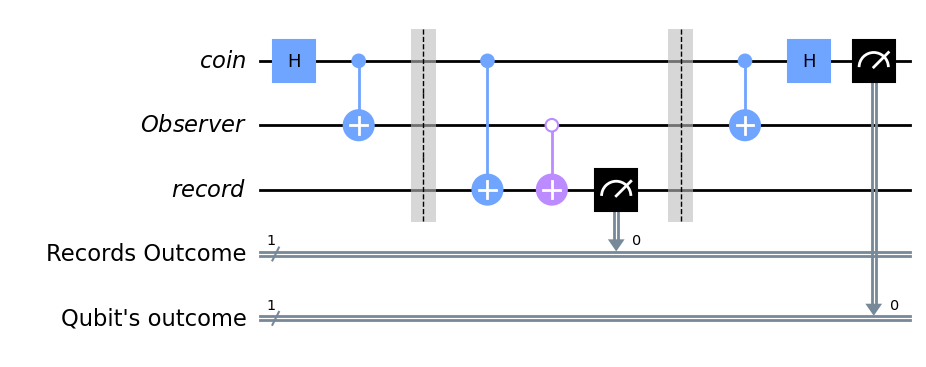

In [5]:
#to make sure the qubit is entangled we would use hadamard again
qc.h(0)
cr2=ClassicalRegister(1,name="Qubit's outcome")
qc.add_register(cr2)
qc.measure(0,1)
qc.draw('mpl')

On measuring this we should alaways get an outcome of 1 on record qubit and 0 on coin qubit, i.e. our outcome everytime should be 01. This would mean that the observer amde an observation yet the outcome was reversed. This would be an evidence for No-Collapse Theory.

In [6]:
from qiskit_aer import AerSimulator
backend=AerSimulator()
transpiled=transpile(qc,backend)
results=backend.run(transpiled).result().get_counts()
print(results)

{'0 1': 1024}


*Collapse case*

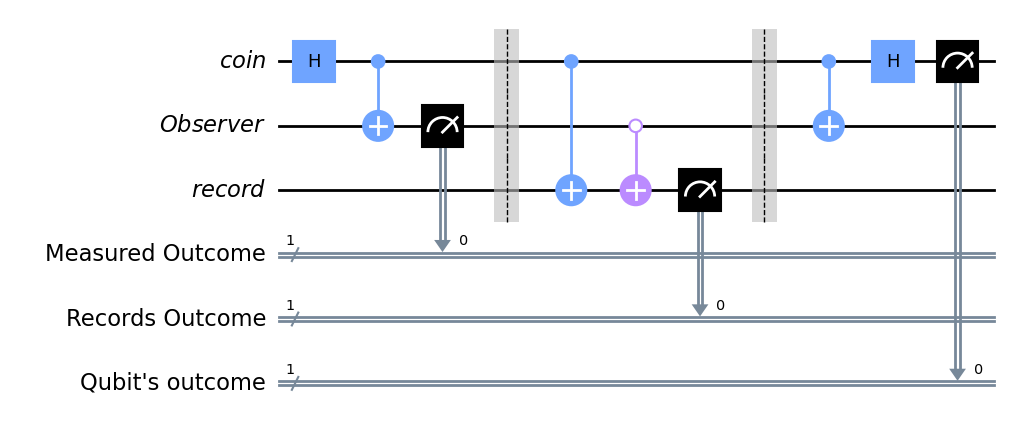

In [7]:
qr1=QuantumRegister(1,name="coin")
qr2=QuantumRegister(1,name="Observer")
qr3=QuantumRegister(1,name="record")
cr3=ClassicalRegister(1,name="Measured Outcome")
qc=QuantumCircuit(qr1,qr2,qr3,cr3,cr1,cr2)
qc.h(0)
qc.cx(0,1)
qc.measure(1,0)#Adding mid circuit measurement to get a Irreversible case
qc.barrier()
qc.cx(0,2)
from qiskit.circuit.library.standard_gates import XGate
acx=XGate().control(1,ctrl_state='0')
qc.append(acx,[1,2])

qc.measure(2,1)
qc.draw('mpl')
qc.barrier()
qc.cx(0,1)#undoes the  observer's measurement, therefore unentangling it and returning it to to the original state
qc.draw('mpl')
qc.h(0)

qc.measure(0,2)
qc.draw('mpl')

Here the record qubit measured will still be 1, but qubit was irreversibly collapsed to either 0 or 1 state and hadamard instead of taking it back to 0 would put it in superposition of 1. So this time we would measure 0 half the time, and 1 the other half times.

In [8]:
transpiled=transpile(qc,backend)
results=backend.run(transpiled).result().get_counts()
print(results)

{'0 1 0': 280, '1 1 0': 242, '1 1 1': 250, '0 1 1': 252}


The first bit represents Measured Outcome at first, the second is the record qubit and the third is the Qubit Outcome after irreversible collapse. As we can see record is always 1, but qubit after collapse is zero half the times and 1 other half times.

But reversible measurements are very hard to achieve in real world scenarios. We need to have coherent control over the observer's memory in order to acheive this. This was the first idea of the Universal Quantum Computer.